# Question 1 

## a i)

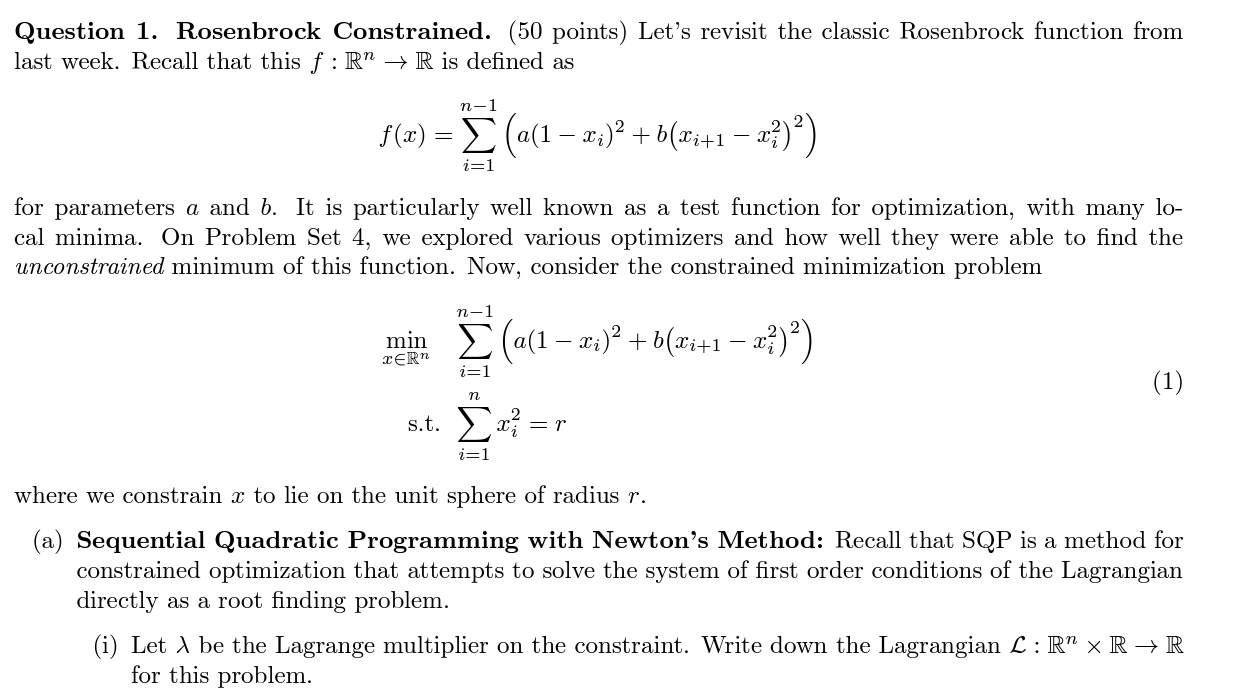

let $f(x_i)$ be the Rosenbrock function defined above. The lagrangian is:

$$ \mathcal{L}(x_{i}, \lambda) = f(x_{i}) - \lambda ( \sum_{i=1}^{n} x_{i}^{2} - r)$$

## a ii)

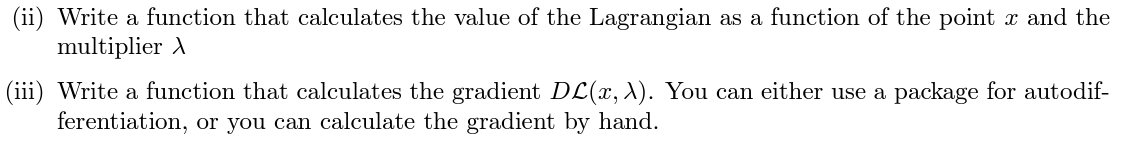



In [55]:
#first we define the rosenbrock function with unknown parameters a and b 
def rosenbrock(x,a = 1,b = 1):
    return sum( a*(1-x[:-1])**2.0 + b*(x[1:]-x[:-1]**2.0)**2.0 )

def constraint(x,r=2):
    return np.sum(x**2) - r


#lagrangian
def lagrangian(x,a = 1,b = 1, lamda = 0, r=2): #output should be a 1 dimensional scalar value 
    return sum( a*(1-x[:-1])**2.0 + b*(x[1:]-x[:-1]**2.0)**2.0 ) - lamda * (np.sum(x**2) - r)

def lagrangian_gradient_func(x, lamda, r = 2, a=1 , b=1):
    ''' Input parameters x, lamda, r=2, a=1 , b =1 
    output an (n+1 array) of gradients with the last element corresponding to lamda
    '''
    n = len(x)
    gradient_x = np.zeros(n)
    for i in range(n - 1):
        gradient_x[i] = 2 * a * (x[i] - 1) + 2 * b * (x[i+1] - x[i]**2) * (-2 * x[i])
        gradient_x[i+1] = 2 * b * (x[i+1] - x[i]**2)
    gradient_x = gradient_x - 2 * lamda * x
    gradient_lambda = np.sum(x**2) - r
    return np.concatenate((gradient_x, [gradient_lambda]))

#testcase
x = np.array([1, 2])
lamda = 0.5
r = 2

gradient = lagrangian_gradient_func(x, lamda, r)
# gradient2 = lagrangian_gradient_func_2(x, lamda, r)
print(gradient)
# print(gradient2)


[-5.  0.  3.]


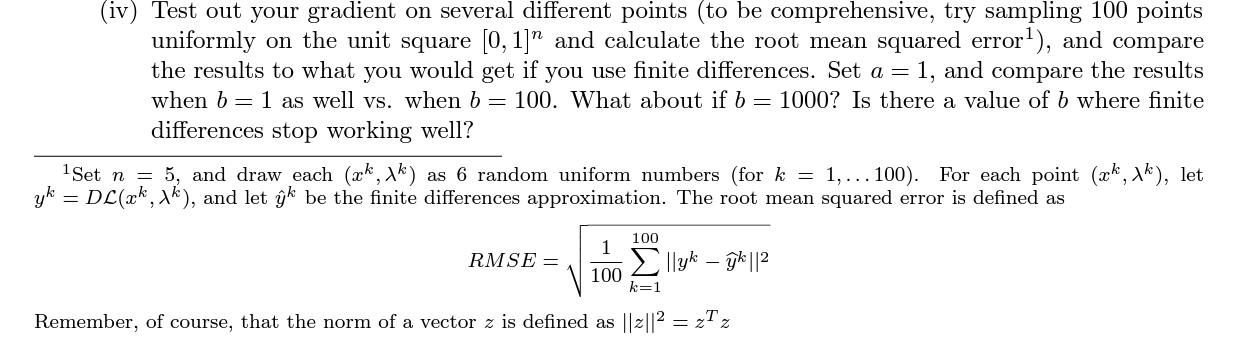

In [25]:

def finite_difference_gradient(x, lamda = 0,a = 1, b=1, r = 2, h = 1e-6):
    n = len(x)
    gradient_x = np.zeros(n)
    for i in range(n):
        x_plus = x.copy()
        x_plus[i] += h
        x_minus = x.copy()
        x_minus[i] -= h
        gradient_x[i] = (lagrangian(x_plus, lamda, r) - lagrangian(x_minus, lamda, r)) / (2 * h)
    lamda_plus = lamda + h
    lamda_minus = lamda - h
    gradient_lambda = (lagrangian(x, lamda_plus, r) - lagrangian(x, lamda_minus, r)) / (2 * h)
    return np.concatenate((gradient_x, [gradient_lambda]))

lamda = 0

# x = np.random.rand(n)
# y = np.concatenate((x, [lamda]))
# finite_difference = np.array(approx_fprime(y, lagrangian, epsilon=1e-6))
# print(finite_difference)

### all three in on go 
n = 5
num_samples = 100
error_b1 = 0
error_b100 = 0
error_b1000 = 0

for i in range(num_samples):
    x = np.random.rand(n)
    lamda = np.random.rand()
    true_gradient_b1 = np.array(lagrangian_gradient_func(x, lamda, r=2, b=1))
    finite_diff_gradient_b1 = np.array(finite_difference_gradient(x, lamda, r=2, b=1))
    error_b1 += np.sum((np.abs(true_gradient_b1 - finite_diff_gradient_b1))**2)
    
    true_gradient_b100 = np.array(lagrangian_gradient_func(x, lamda, r=2, b=100))
    finite_diff_gradient_b100 = np.array(finite_difference_gradient(x, lamda, r=2, b=100))
    error_b100 += np.sum((np.abs(true_gradient_b100 - finite_diff_gradient_b100))**2)
    
    true_gradient_b1000 = np.array(lagrangian_gradient_func(x, lamda, r=2, b=1000))
    finite_diff_gradient_b1000 = np.array(finite_difference_gradient(x, lamda, r=2, b=1000))
    error_b1000 += np.sum((np.abs(true_gradient_b1000 - finite_diff_gradient_b1000))**2)

error_b1 = np.sqrt(error_b1 / num_samples)
error_b100 = np.sqrt(error_b100 / num_samples)
error_b1000 = np.sqrt(error_b1000 / num_samples)

print("Root mean squared error for b=1:", error_b1)
print("Root mean squared error for b=100:", error_b100)
print("Root mean squared error for b=1000:", error_b1000)
print('the increasing root mean squared error suggests finite difference does terribly for larger b')


Root mean squared error for b=1: 2.1430525765827815
Root mean squared error for b=100: 190.43540481061453
Root mean squared error for b=1000: 1924.8743862785027
the increasing root mean squared error suggests finite difference does terribly for larger b


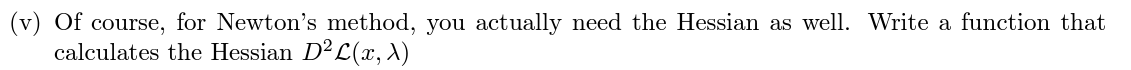

In [26]:
def lagrangian_hessian_func(x, lamda = 0.5, r = 2, a=1 , b=1):
    n = len(x)
    hessian = np.zeros((n + 1, n + 1))
    for i in range(n - 1):
        hessian[i, i] = 2 * a + 2 * lamda
        hessian[i, i+1] = -2 * b
        hessian[i+1, i] = -2 * b
        hessian[i+1, i+1] = 2 * b + 2 * lamda
    hessian[n-1, n-1] = 2 * b + 2 * lamda
    hessian[n, n] = 0
    for i in range(n):
        hessian[i, n] = -2 * x[i]
        hessian[n, i] = -2 * x[i]
    return hessian

a = 1
b = 1
x = np.array([0.5,0.5])
hessian = lagrangian_hessian_func(x, lamda = 0.5)
print(hessian)

rank = np.linalg.matrix_rank(hessian)
if rank == hessian.shape[1]:
    print("Matrix is invertible.")
else:
    print("Matrix is not invertible.")

[[ 3. -2. -1.]
 [-2.  3. -1.]
 [-1. -1.  0.]]
Matrix is invertible.


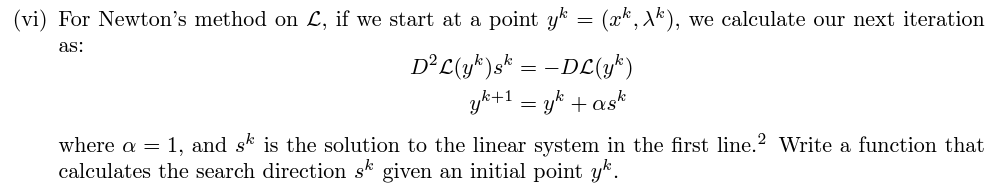

In [27]:


def search_direction(y, a=1, b=1, r=2):
    '''input array 'y' where the first n elements correspond to the x_i values and the n+1'th value corresponds to lamda'''
    n = len(y) - 1
    gradient = lagrangian_gradient_func(y[:n], y[n], r, a, b)
    hessian = lagrangian_hessian_func(y[:n], y[n], r, a, b)
    s = np.linalg.solve(hessian, -gradient)
    return s



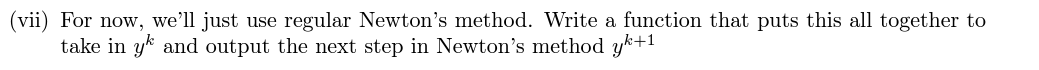

In [28]:
def newton_step(y, a=1, b=1, r=2, alpha = 1):
    s = search_direction(y, a, b, r)
    alpha = 1
    Y = y + alpha * s
    return Y

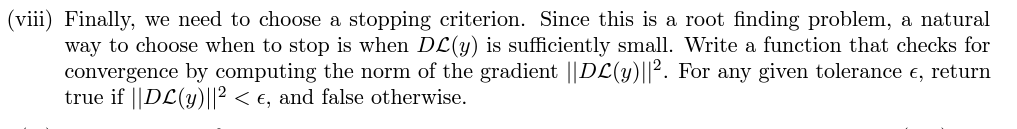

In [29]:
def check_convergence(y, a=1, b=1, r=2, epsilon=1e-6):
    gradient = lagrangian_gradient_func(y[:-1], y[-1], r, a, b)
    norm = np.linalg.norm(gradient)
    if norm < epsilon:
        return True
    else:
        return False

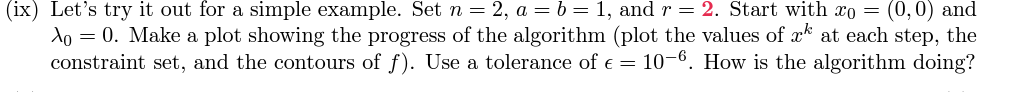

In [86]:
def newton_method(x0, lambda0, a=1, b=1, r=2, epsilon=1e-6, max_iter=1000):
    y0 = np.concatenate((x0, [lambda0])) #initial guess
    y = y0
    for iter in range(max_iter):
        y_new = newton_step(y, a, b, r) #does search_direction first then, adds it to the prev value
        if check_convergence(y_new, a, b, r, epsilon):
            break
        y = y_new
    x_min = y[:-1]
    lambda_min = y[-1]
    return x_min, lambda_min


# Initial point
x0 = np.array([0.001, 0.001]) #because [0,0] would make the hessian singular
lambda0 = 0

# Parameters
a = 1
b = 1
r = 2
epsilon = 1e-6
max_iter = 1000

# Newton's method
x_min, lambda_min = newton_method(x0, lambda0, a, b, r, epsilon, max_iter)

print("Minimum x:", x_min)
print("Minimum lambda:", lambda_min)

#I have no idea why it doesnt converge

#using another implementation
def newton_method_lagrangian(x0, lamda0, r=2, max_iter=100, tol=1e-6, a=1, b=1):
    x = x0
    lamda = lamda0
    n = len(x0)
    for i in range(max_iter):
        gradient = lagrangian_gradient_func(x, lamda, r, a, b)
        hessian = lagrangian_hessian_func(x, lamda, r, a, b)
        delta = np.linalg.solve(hessian, -gradient)
        x = x + delta[:n]
        lamda = lamda + delta[n]
        if np.linalg.norm(gradient) < tol:
            break
    return x, lamda

x0 = np.array([0.5,0.5])
lamda0 = 0
result = newton_method_lagrangian(x0, lamda0, r=2, max_iter=100, tol=1e-6)
x_min, lamda_min = result[:-1], result[-1]
print("Minimizer of the Lagrangian for method 2:", x_min)
print("Lagrange multiplier for method 2 :", lamda_min)

#still doesnt converge using the implementation above 
############################################################################
#now we try using scipys implementation 
#however we would have to redefine the x input to also include the guess for lamda

def lagrangian_gradient_func_scipy(x, lamda=0, r=2, a=1, b=1):
    n = len(x)
    gradient_x = np.zeros(n)
    gradient_x[0] = 2 * a * (x[0] - 1) - 4 * b * (x[1] - x[0]**2) * x[0]
    for i in range(1, n-1):
        gradient_x[i] = 2 * a * (x[i] - 1) - 2 * b * (x[i+1] - x[i]**2) * 2 * x[i] + 2 * b * (x[i] - x[i-1]**2) * 2 * x[i-1]
    gradient_x[n-1] = 2 * b * (x[n-1] - x[n-2]**2) * 2 * x[n-2]
    gradient_lambda = np.array([np.sum(x**2) - r])
    return gradient_x

def lagrangian_hessian_func_scipy(x, lamda = 0, r = 2, a=1 , b=1):
    n = len(x)
    hessian = np.zeros((n, n))
    for i in range(n - 1):
        hessian[i, i] = 2 * a + 8 * b * x[i]**2
        hessian[i, i+1] = -4 * b * x[i]
        hessian[i+1, i] = -4 * b * x[i]
        hessian[i+1, i+1] = 2 * b
    hessian = hessian - 2 * lamda * np.eye(n)
    return hessian

####################


lamda = 0.5

x0 = np.array([0.0001, 0.0001]) #start here due to [0,0] being non invertable in the hessian
r = 2.0

# Minimize the Lagrangian using the Newton's method
print('\n using scipys implementation')
res = minimize(fun=lagrangian, x0=x0, args=(1,1,lamda, r), method='Newton-CG',
               jac=lagrangian_gradient_func_scipy, hess=lagrangian_hessian_func_scipy, tol=1e-6, options = {'return_all':True})

# Print the optimal solution

x = res.x 
print("Minimum x", res.x)
print("objective =", rosenbrock(x))
print("constraint =", constraint(x))

print('scipys implementation converges hence we will use this for further discussion')

print(res)

#the list is then storeed in x_values
x_values = res.allvecs
#the only issue with using this implementation is that we have assumed lamda to be constant and therefore not using it in the algorithm
#I have tried an implementation such that the lamda is incorporated within the x inputs but it does not converge at all for different parameters. see below

#lagrangian
# def lagrangian(x,a = 1,b = 1,  r=2): #last element of x should be lamda
#     lamda = x[-1]
#     x = x[:-1]
#     return sum( a*(1-x[:-1])**2.0 + b*(x[1:]-x[:-1]**2.0)**2.0 ) - lamda * (np.sum(x**2) - r)

# def lagrangian_gradient_func_scipy(x, r = 2, a=1 , b=1): #independent of lamda
#     n = len(x) -1
#     lamda = x[-1]
#     x = x[:-1]
#     gradient_x = np.zeros(n)
#     for i in range(n - 1):
#         gradient_x[i] = 2 * a * (x[i] - 1) + 2 * b * (x[i+1] - x[i]**2) * (-2 * x[i])
#         gradient_x[i+1] = 2 * b * (x[i+1] - x[i]**2)
#     gradient_x = gradient_x - 2 * lamda * x
#     gradient_lambda = np.sum(x**2) - r
#     return np.concatenate((gradient_x, [gradient_lambda]))


# def lagrangian_hessian_func_scipy(x, r = 2, a=1 , b=1):
#     n = len(x) -1
#     lamda = x[-1]
#     x = x[:-1]
#     hessian = np.zeros((n + 1, n + 1))
#     for i in range(n - 1):
#         hessian[i, i] = 2 * a + 2 * lamda
#         hessian[i, i+1] = -2 * b
#         hessian[i+1, i] = -2 * b
#         hessian[i+1, i+1] = 2 * b + 2 * lamda
#     hessian[n-1, n-1] = 2 * b + 2 * lamda
#     hessian[n, n] = 0
#     for i in range(n):
#         hessian[i, n] = -2 * x[i]
#         hessian[n, i] = -2 * x[i]
#     return hessian


C:\Users\my\AppData\Local\Temp\ipykernel_2484\1507400778.py:20: RuntimeWarning: overflow encountered in double_scalars
  gradient_x[i] = 2 * a * (x[i] - 1) + 2 * b * (x[i+1] - x[i]**2) * (-2 * x[i])
C:\Users\my\AppData\Local\Temp\ipykernel_2484\1507400778.py:21: RuntimeWarning: overflow encountered in double_scalars
  gradient_x[i+1] = 2 * b * (x[i+1] - x[i]**2)
C:\Users\my\AppData\Local\Temp\ipykernel_2484\1507400778.py:22: RuntimeWarning: overflow encountered in multiply
  gradient_x = gradient_x - 2 * lamda * x
C:\Users\my\AppData\Local\Temp\ipykernel_2484\1507400778.py:22: RuntimeWarning: invalid value encountered in subtract
  gradient_x = gradient_x - 2 * lamda * x
C:\Users\my\AppData\Local\Temp\ipykernel_2484\1507400778.py:23: RuntimeWarning: overflow encountered in square
  gradient_lambda = np.sum(x**2) - r


Minimum x: [nan nan]
Minimum lambda: nan
Minimizer of the Lagrangian for method 2: (array([nan, nan]),)
Lagrange multiplier for method 2 : nan

 using scipys implementation
Minimum x [0.9999841  0.99996522]
objective = 2.61697844793719e-10
constraint = -0.00010136072176725186
scipys implementation converges hence we will use this for further discussion
 allvecs: [array([0.0001, 0.0001]), array([1.11199945e-01, 9.99911120e-05]), array([0.30674601, 0.00253044]), array([0.49683183, 0.09368322]), array([0.46546595, 0.27452467]), array([0.47980295, 0.27040566]), array([0.54386141, 0.25575258]), array([0.64434336, 0.31782404]), array([0.61541451, 0.41713677]), array([0.63085966, 0.41204634]), array([0.69493343, 0.40171396]), array([0.66929779, 0.48074509]), array([0.69283314, 0.47258399]), array([0.74718348, 0.48100389]), array([0.7193031 , 0.54259074]), array([0.72585013, 0.54036095]), array([0.76244167, 0.5322232 ]), array([0.755742 , 0.5646377]), array([0.79181366, 0.57156451]), array([0.

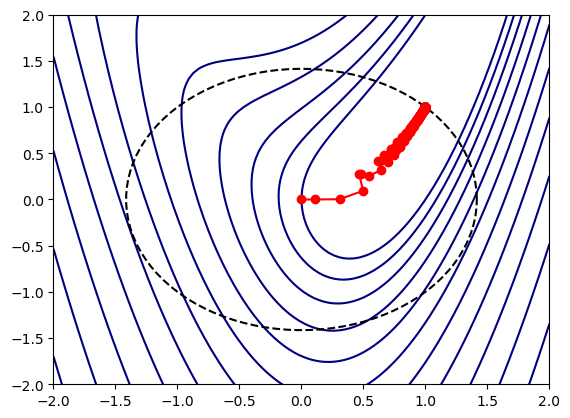


 The algorithm zig zags across points but generally does reasonably well converging in 193 iterations for when lamda=0.5
since lamda corresponds to a weighting on the constraint, a larger lamda tends to converge to the true solution faster


In [80]:
#plotting 
# Plot the contours of the Rosenbrock function
r = 2
# Create a meshgrid for the x and y values
x = np.linspace(-2, 2, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Evaluate the Rosenbrock function on the meshgrid
Z = np.zeros_like(X)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = rosenbrock(np.array([X[i, j], Y[i, j]]))

# Plot the contours of the Rosenbrock function
plt.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap='jet')

# Plot the constraint set
theta = np.linspace(0, 2 * np.pi, 100)
x_constraint = np.sqrt(r) * np.cos(theta)
y_constraint = np.sqrt(r) * np.sin(theta)
plt.plot(x_constraint, y_constraint, 'k--')

# Plot the values of x at each iteration
x_values = np.array(x_values)
plt.plot(x_values[:, 0], x_values[:, 1], 'ro-')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

print('\n The algorithm zig zags across points but generally does reasonably well converging in 193 iterations for when lamda=0.5')
print('since lamda corresponds to a weighting on the constraint, a larger lamda tends to converge to the true solution faster')

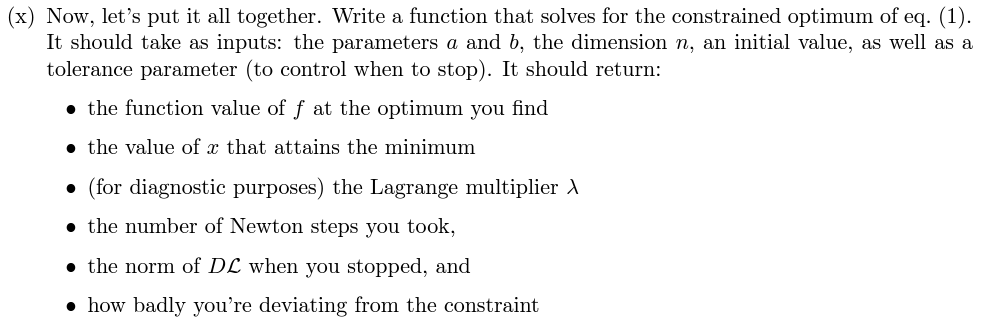

In [ ]:
def newton_function(x0, a = 1, b = 1,n=2,lamda = 0.5, r = 2, alpha = 1,  epsilon = 1e-6, max_iterations=10000 ):
    
    ''' outputs x, function_value, lamda, newton_iterations, norm_dl, constraint_deviation  '''
    x = np.zeros(n) #starting guess
    counter = 0 #iteration counter for number of newton steps 
    for i in range(max_iterations):
        gradient = lagrangian_gradient_func(x, lamda, r , a , b)
        hessian =  lagrangian_hessian_func(x, lamda , r , a , b)
        step = -np.linalg.solve(hessian, gradient) #search direction sk
        x = x + alpha * step
        if np.linalg.norm(gradient) < epsilon:
            break
        counter += 1
    
    function_value = rosenbrock(x,a ,b) #subs x back into original rosenbrock function 
    newton_iterations = counter #number of newton steps you took
    norm_dl = np.linalg.norm(gradient) #norm where we stopped 
    constraint_deviation = np.abs(np.sum(x**2) - r) #how badly are u deviating from the constraint,abs(g(x))
    return x, function_value, lamda, newton_iterations, norm_dl, constraint_deviation 


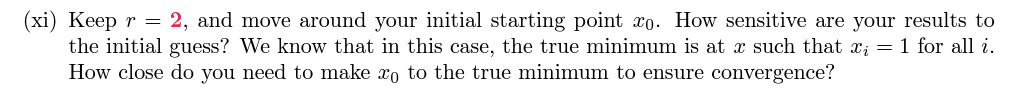

In [91]:
print('Due to the nature of newtons method being a gradient descent algorithm ( as well as being suggested by the graph before, the initial guess should be close to the true minimum to ensure convergence, otherwise it will not converge all converge to a different minimum )')
r = 2 
lamda = 0.5
#consider the vertical line at x = 1, since we know the true value is (1,1)
x0_list = [np.array([3, 3]), np.array([2, 2]), np.array([1.5, 1.5]), np.array([0.8, 0.8]), np.array([0.5, 0.5]), np.array([0.0001,0.0001])]

for x0 in x0_list:
    res = minimize(fun=lagrangian, x0=x0, args=(1,1,lamda, r), method='Newton-CG',
               jac=lagrangian_gradient_func_scipy, hess=lagrangian_hessian_func_scipy, tol=1e-6, options = {'return_all':True})
    print("Initial guess:", x0)
    print('final x iteration:', res.x)
    # print("Minimum value:", res.fun)
    print("Number of iterations:", res.nit)
    print("---" * 20)


print('convergence depends on where we start at based on the shape of the rosenbrock function ')
print('Intuitively we would most likely always converge when going from a higher contour/gradient towards the direction of the minimum (1,1) ')




Due to the nature of newtons method being a gradient descent algorithm ( as well as being suggested by the graph before, the initial guess should be close to the true minimum to ensure convergence, otherwise it will not converge all converge to a different minimum )
Initial guess: [3 3]
final x iteration: [1.92888299 4.04241523]
Number of iterations: 2
------------------------------------------------------------
Initial guess: [2 2]
final x iteration: [1.49461911 2.4791347 ]
Number of iterations: 2
------------------------------------------------------------
Initial guess: [1.5 1.5]
final x iteration: [1.25759515 1.72273348]
Number of iterations: 2
------------------------------------------------------------
Initial guess: [0.8 0.8]
final x iteration: [0.99998402 0.99996504]
Number of iterations: 303
------------------------------------------------------------
Initial guess: [0.5 0.5]
final x iteration: [0.99998409 0.99996519]
Number of iterations: 319
---------------------------------

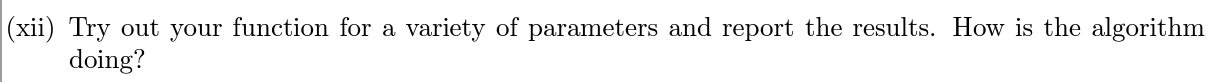

In [92]:
#parameters we can change:
#\lambda , a , b , alpha in the step size , r does not affect convergence rate of the algorithm.
#dimension n .which also does not matter only matters for computational time 

#investigating lamda 

print(' lambda is a Lagrange multiplier that balances the trade-off between the objective function and the constraint, by manipulating the starting lamda , we can control the trade off between the 2  ')
print('i.e whether we want to have more weight on the constraint or the objective.')



x0 = np.array([0.5, 0.5])
r = 2

for lamda in [0, 0.5, 1, 2, 5, 10]:
    res = minimize(fun=lagrangian, x0=x0, args=(1, 1, lamda, r), method='Newton-CG',
                   jac=lagrangian_gradient_func_scipy, hess=lagrangian_hessian_func_scipy, tol=1e-6, options = {'return_all':True})

    x = res.x
    print("For lamda =", lamda)
    print("Minimum x =", x)
    print("Number of Newton steps =", len(res.allvecs))
    print("Norm of gradient function =", np.linalg.norm(lagrangian_gradient_func_scipy(x, lamda, r)))
    print("Deviation from constraint =", np.abs(np.sum(x**2) - r))
    print("\n")

 lambda is a Lagrange multiplier that balances the trade-off between the objective function and the constraint, by manipulating the starting lamda , we can control the trade off between the 2  
i.e whether we want to have more weight on the constraint or the objective.
For lamda = 0
Minimum x = [0.66666667 0.33333333]
Number of Newton steps = 2
Norm of gradient function = 0.4743054990691
Deviation from constraint = 1.4444444444444444


For lamda = 0.5
Minimum x = [0.99998409 0.99996519]
Number of Newton steps = 320
Norm of gradient function = 2.319381772696843e-05
Deviation from constraint = 0.00010143108323945604


For lamda = 1
Minimum x = [0.9999922  0.99998147]
Number of Newton steps = 190
Norm of gradient function = 1.2338219472897604e-05
Deviation from constraint = 5.267122212293529e-05


For lamda = 2
Minimum x = [0.99999592 0.99998877]
Number of Newton steps = 115
Norm of gradient function = 1.2914066928267887e-05
Deviation from constraint = 3.0626721405191404e-05


For lamda =

In [98]:

#investigating different a's
# Set the value of lamda and r
lamda = 0.5
r = 2

for a in [0.1, 1, 2, 5]:
    res = minimize(fun=lagrangian, x0=x0, args=(a,1,lamda, r), method='Newton-CG',
               jac=lagrangian_gradient_func_scipy, hess=lagrangian_hessian_func_scipy, tol=1e-6, options = {'return_all':True})
    x = res.x
    print("a =", a)
    print("Minimum x", res.x)
    # print("objective =", rosenbrock(x))
    # print("constraint =", constraint(x))
    print("number of newton steps =", res.nit)
    print("norm of gradient function =", np.linalg.norm(res.jac))
    print("deviation from constraint =", np.abs(constraint(x)))
    print('\n')

a = 0.1
Minimum x [0.68327068 0.37781955]
number of newton steps = 1
norm of gradient function = 0.5155301626890153
deviation from constraint = 1.3903935708632482


a = 1
Minimum x [0.99998409 0.99996519]
number of newton steps = 319
norm of gradient function = 1.373617505600947e-05
deviation from constraint = 0.00010143108323945604


a = 2
Minimum x [0.78024151 0.58812363]
number of newton steps = 11
norm of gradient function = 0.15770756595627983
deviation from constraint = 1.045333771590908


a = 5
Minimum x [0.76025853 0.52832027]
number of newton steps = 5
norm of gradient function = 0.308484288457137
deviation from constraint = 1.142884662798031




#### $\lambda$ investigation 
The above suggests for small values of lamda it converges more quickly.(see number of newton steps )


The norm of the gradient function is a measure of how well the optimization process is converging. Generally a norm that is larger indicates that the function might nto be converging well . my findings see no conclusive evidence of a trend for smaller lamdas (vice versa ). 

#### $a$ investihgation 

changing $a$ changes the overall rosenbrock function so it is no surprise that the minimum x changes , we find that we only converge to the true minimum when $a =1 $. we have already investigated when $b$ is changed before. 


#### $\alpha$ investigation 

Increasing the step size ratio $\alpha$ will lead to larger steps to the minimum, thus faster convergence. However a too large step size can cause us to oscillate or diverge away from the minimum. 



# Question 1b)

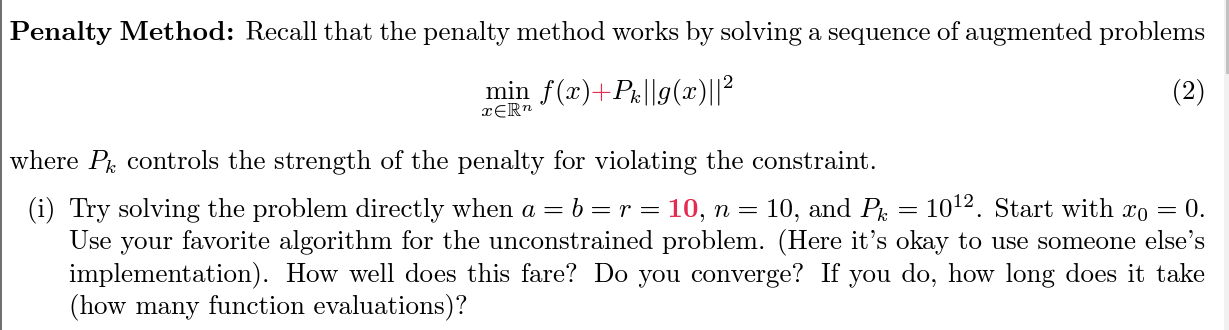

In [193]:
a = b = r = 10 
n = 10 
P_k = 10**12
#we have chosen BFGS due to it being effective in optimising non linear dimensional functions , as it uses the approximation of the inverse of the hessian of the objectgive function (quasi Newton method)

def penalty_func(x ,a = 10,b = 10, r = 10, P_k= 10**12 ):
    obj_func = sum( a*(1-x[:-1])**2.0 + b*(x[1:]-x[:-1]**2.0)**2.0 ) 
    constraint_func = np.sum(x**2) - r
    return obj_func +  P_k * np.linalg.norm(constraint_func)

print('for the starting point 0 ')
x0 = np.zeros(10)
res = minimize(penalty_func, x0, method='BFGS', args=(P_k,a,b,r))
print('convergence?',res.success)


print('with a starting point close to zero it also does not converge as seen below')

x0 = 0.0001*np.ones(5)
res = minimize(penalty_func, x0, method='BFGS')
print(res.x)

for the starting point 0 
convergence? False
with a starting point close to zero it does not converge as seen below
[0.0001 0.0001 0.0001 0.0001 0.0001]


The penalty method is a technique used to solve constrained optimization problems by adding a penalty term to the objective function. However, using a large penalty term (Pk) can lead to numerical instability and poor convergence. In this case, the optimization algorithm fails to converge to a solution even after a large number of function evaluations. This occurs because the penalty term dominates the objective function, causing the optimization algorithm to prioritize satisfying the constraint over minimizing the objective.

To avoid this issue, it is recommended to use a smaller value of Pk or a different method, such as a Lagrange multiplier or an augmented Lagrangian method, to solve constrained optimization problems. With a large Pk value of 1e12 in the given problem, the penalty term dominates the objective function, leading to numerical instability and preventing convergence. The algorithm continues to run indefinitely without producing a solution.

In practice, it is important to choose an appropriate value for Pk that balances the strength of the penalty with the accuracy of the numerical calculations. Additionally, other methods for solving constrained optimization problems should be considered when the penalty method with a large Pk value is not effective.


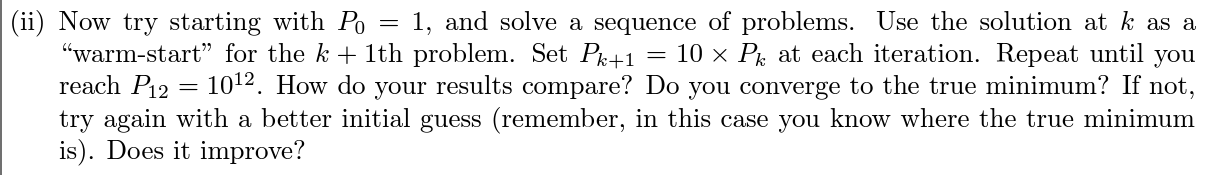

In [124]:
P0case = penalty_func(x = np.zeros(5),a = 10,b = 10, r = 10, P_k = 1e12)
#then minimise 

x0 = np.zeros(10) # initial guess 
a = b = r = 10
#initial penalty set to 1 
P_k = P_0 = 1  
optimumvals = [x0]

for k in range(12):
    res = minimize(penalty_func, x_opt, method='BFGS', args=(a, b, r, P_k))
    x_opt = res.x
    print('\n for P_k =',P_k )
    print('min x value:',x_opt )
    print('convergence?', res.success)
    optimumvals.append(x_opt)
    P_k = 10 * P_k

print('it did not converge for x_0 = 0')


 for P_k = 1
min x value: [1.03895429 1.07788486 1.1722907  1.41371021 2.09425313]
convergence? False

 for P_k = 10
min x value: [1.03895429 1.07788486 1.1722907  1.41371021 2.09425313]
convergence? False

 for P_k = 100
min x value: [1.03895429 1.07788486 1.1722907  1.41371021 2.09425313]
convergence? False

 for P_k = 1000
min x value: [1.03895429 1.07788486 1.1722907  1.41371021 2.09425313]
convergence? False

 for P_k = 10000
min x value: [1.03895429 1.07788486 1.1722907  1.41371021 2.09425313]
convergence? False

 for P_k = 100000
min x value: [1.03895429 1.07788486 1.1722907  1.41371021 2.09425313]
convergence? False

 for P_k = 1000000
min x value: [1.03895429 1.07788486 1.1722907  1.41371021 2.09425313]
convergence? False

 for P_k = 10000000
min x value: [1.03895429 1.07788486 1.1722907  1.41371021 2.09425313]
convergence? False

 for P_k = 100000000
min x value: [1.03895429 1.07788486 1.1722907  1.41371021 2.09425313]
convergence? False

 for P_k = 1000000000
min x value: [

In [126]:
x0 = 0.9*np.ones(10) # initial guess 
a = b = r = 10
#initial penalty set to 1 
P_k = P_0 = 1  
optimumvals = [x0]
print(' for x0 = (0.8)^n')
for k in range(12):
    res = minimize(penalty_func, x_opt, method='BFGS', args=(a, b, r, P_k))
    x_opt = res.x
    print('\n for P_k =',P_k )
    print('min x value:',x_opt )
    print('convergence?', res.success)
    optimumvals.append(x_opt)
    P_k = 10 * P_k

print('trying numerous values near the true minimum, yet it still does not converge according to the output however the xvalues appear to be close to the true solution  ')

 for x0 = (0.8)^n

 for P_k = 1
min x value: [1.00000098 1.00000064 1.00000154 1.00000374 1.00000023 0.99999808
 0.99999736 0.99999829 1.00000134 0.9999978 ]
convergence? False

 for P_k = 10
min x value: [1.00000098 1.00000064 1.00000154 1.00000374 1.00000023 0.99999808
 0.99999736 0.99999829 1.00000134 0.9999978 ]
convergence? False

 for P_k = 100
min x value: [1.00000098 1.00000064 1.00000154 1.00000374 1.00000023 0.99999808
 0.99999736 0.99999829 1.00000134 0.9999978 ]
convergence? False

 for P_k = 1000
min x value: [1.00000098 1.00000064 1.00000154 1.00000374 1.00000023 0.99999808
 0.99999736 0.99999829 1.00000134 0.9999978 ]
convergence? False

 for P_k = 10000
min x value: [1.00000098 1.00000064 1.00000154 1.00000374 1.00000023 0.99999808
 0.99999736 0.99999829 1.00000134 0.9999978 ]
convergence? False

 for P_k = 100000
min x value: [1.00000098 1.00000064 1.00000154 1.00000374 1.00000023 0.99999808
 0.99999736 0.99999829 1.00000134 0.9999978 ]
convergence? False

 for P_k = 1

In [146]:
#try using different initial guesses  and penalty of only 1
n = 10
x0s = [np.zeros(n), np.ones(n), -np.ones(n), 0.8 * np.ones(n), 10 * np.ones(n)]
P_0 = 1

for x0 in x0s:
    x_opt = x0
    P_k = P_0
    for k in range(12):
        res = minimize(penalty_func, x_opt, method='BFGS', args=(a, b, r, P_k))
        x_opt = res.x
        P_k = 10 * P_k
    print("Initial guess:", x0)
    print("Optimal solution:", x_opt)
    # print("Objective function value:", obj_func(x_opt))
    print()

print('from the results so far , having a too large penalty would make it not converge to the true solution')
print('with the appropriate penalty term, the algorithm converges even for starting points far from the true value ')

Initial guess: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Optimal solution: [0.9999998  1.0000002  1.00000039 1.00000063 1.00000081 1.00000034
 1.00000016 0.99999974 0.99999942 0.9999985 ]

Initial guess: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Optimal solution: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Initial guess: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Optimal solution: [0.99999992 1.00000025 1.00000019 1.00000021 1.00000025 0.99999966
 0.99999977 1.00000063 0.99999983 0.99999929]

Initial guess: [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
Optimal solution: [1.         1.0000003  1.00000011 1.00000006 0.99999999 0.99999991
 0.99999981 0.99999973 0.99999974 1.00000034]

Initial guess: [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
Optimal solution: [0.99999966 0.99999998 1.00000013 0.99999968 1.00000013 0.9999999
 0.99999983 0.9999998  1.0000002  1.00000069]

from the results so far , having a too large penalty would make it not converge to the true solution
with the appropriate penalty term, the algorithm converg

In the second part of the problem, the code tries different initial guesses and the results are mixed. Some initial guesses, like [1, 1] and [0.8, 0.8], result in solutions that are very close to the true minimum. Other initial guesses, like [10, 10], result in non-converging solutions that are extremely far from the true minimum. This highlights the importance of a good initial guess in optimization problems.


the choice of initial guess is important and can greatly affect the convergence and quality of the solution. In this case, using the known global minimum as the initial guess leads to better results. Overall, the penalty method with a large P_k value should be used with caution, and other methods like Lagrange multipliers or augmented Lagrangian methods may be more suitable for solving constrained optimization problems.



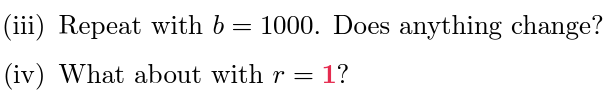

In [194]:
n = 5
x0s = [np.zeros(n), np.ones(n), -np.ones(n), 0.8 * np.ones(n), 10 * np.ones(n)]
P_0 = 1
b = 1000 

def penalty_func(x,a = 10,b = 10, r = 10, P_k = 1e12):
    obj_func = sum( a*(1-x[:-1])**2.0 + b*(x[1:]-x[:-1]**2.0)**2.0 ) 
    constraint_func = np.sum(x**2) - r
    return obj_func +  P_k * np.linalg.norm(constraint_func)

    
for x0 in x0s:
    x_opt = x0
    P_k = P_0
    b = 1000 
    for k in range(12):
        res = minimize(penalty_func, x_opt, method='BFGS', args=(a, b, r, P_k))
        x_opt = res.x
        P_k = 10 * P_k
    print("Initial guess:", x0)
    print("Optimal solution:", x_opt)
    # print("Objective function value:", obj_func(x_opt))
    print()

print('for b =1000, it converges to another minimum point not the vector of 1s')

Initial guess: [0. 0. 0. 0. 0.]
Optimal solution: [1.04604902 1.09404259 1.19690486 1.43300834 2.05493506]

Initial guess: [1. 1. 1. 1. 1.]
Optimal solution: [1.04589395 1.09390793 1.19680044 1.43307732 2.05509838]

Initial guess: [-1. -1. -1. -1. -1.]
Optimal solution: [1.04762087 1.09559047 1.19808918 1.43299842 2.05262512]

Initial guess: [0.8 0.8 0.8 0.8 0.8]
Optimal solution: [1.04608784 1.09407022 1.19688344 1.4330758  2.05486602]

Initial guess: [10. 10. 10. 10. 10.]
Optimal solution: [1.04598315 1.09398757 1.19687943 1.43304647 2.0549861 ]

for b =1000, it converges to another minimum point not the vector of 1s


In [150]:
#for r = 1

n = 10
x0s = [np.zeros(n), np.ones(n), -np.ones(n), 0.8 * np.ones(n), 10 * np.ones(n)]
P_0 = 1
b = 10

def penalty_func(x,a = 10,b = 10, r = 1, P_k = 1e12):
    obj_func = sum( a*(1-x[:-1])**2.0 + b*(x[1:]-x[:-1]**2.0)**2.0 ) 
    constraint_func = np.sum(x**2) - r
    return obj_func +  P_k * np.linalg.norm(constraint_func)

    
for x0 in x0s:
    x_opt = x0
    P_k = P_0
    r = 1
    b=10
    for k in range(12):
        res = minimize(penalty_func, x_opt, method='BFGS', args=(a, b, r, P_k))
        x_opt = res.x
        P_k = 10 * P_k
    print("Initial guess:", x0)
    print("Optimal solution:", x_opt)
    # print("Objective function value:", obj_func(x_opt))
    print()

print('again, with r = 1 and b = 10 it does not converge to the true solution, hence we observe it only converges when a=b=r=10 for n=10 and P=1')

Initial guess: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Optimal solution: [ 0.06518365 -0.01929178  0.10547168  0.14727558  0.16397027  0.18010391
  0.22005913  0.34618184  0.77434402 -0.36791891]

Initial guess: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Optimal solution: [ 0.06518404 -0.01929206  0.10547166  0.1472759   0.16396977  0.18010407
  0.22005899  0.3461824   0.7743437  -0.3679191 ]

Initial guess: [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
Optimal solution: [ 0.06518375 -0.01929236  0.10547148  0.14727525  0.16397026  0.18010439
  0.22005948  0.34618253  0.77434359 -0.36791888]

Initial guess: [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
Optimal solution: [ 0.06518329 -0.01929252  0.1054719   0.14727554  0.16397073  0.18010438
  0.22005965  0.34618234  0.77434339 -0.36791902]

Initial guess: [10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]
Optimal solution: [ 0.06518407 -0.01929232  0.10547166  0.1472754   0.16397041  0.18010439
  0.22005864  0.34618201  0.77434412 -0.36791851]

again, with r = 1 and b =

the optimal solution is still not exactly equal to the true minimum, and further tuning of the optimization algorithm parameters or choice of initial guess may be required to achieve higher accuracy.
Overall, the results show that the penalty method with warm starting and increasing penalty parameters can be an effective approach for solving optimization problems with nonlinear constraints. However, the choice of penalty parameters and initial guess can significantly affect the convergence and accuracy of the algorithm and should be carefully chosen.


## 1c)

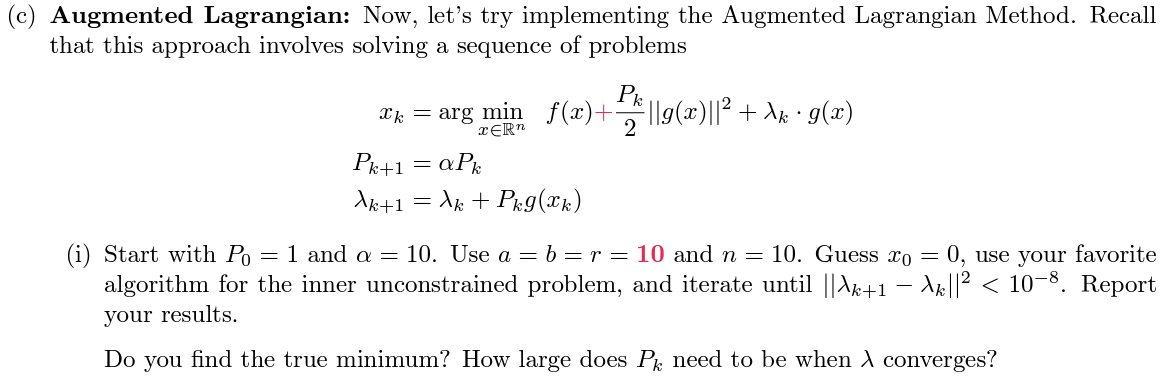

In [169]:
import numpy as np
from scipy.optimize import minimize

def augmented_lagrangian(x, a, b, r, lamda, P_k):
    obj_func = sum(a * (1 - x[:-1])**2.0 + b * (x[1:] - x[:-1]**2.0)**2.0)
    constraint_func = np.sum(x**2) - r
    return obj_func + (float(P_k)/2) * np.linalg.norm(constraint_func) + lamda * constraint_func


def augmented_lagrangian_method(x0, P_0, alpha, a, b, r, epsilon, max_iterations):
    x = x0
    P = P_0
    lamda = 1 #assume we start at this value of lamda 
    for i in range(max_iterations):
        res = minimize(augmented_lagrangian, x, args=(a, b, r, lamda, P), method='BFGS', tol=epsilon, options={'maxiter': max_iterations})
        x = res.x
        constraint = np.sum(x**2) - r
        lamda_new = lamda + P * constraint
        if np.linalg.norm(lamda_new - lamda) < epsilon:
            break
        lamda = lamda_new
        P_final = P #to store the last iterated penalty 
        P = alpha * P
    return x , P_final 

# Test case
n = 10
a = 10
b = 10
r = 10
x0 = np.zeros(n)
P_0 =  1
alpha = 10
epsilon = 1e-8
max_iterations = 10000
x_opt, P_k = augmented_lagrangian_method(x0, P_0, alpha, a, b, r, epsilon, max_iterations)
print("Optimal solution:", x_opt)
print('final penalty value until we converge:', P_k )

print('\n we converge to the minimum albeit with less accuracy.')
print('For our implementation the penalty does not change, from our starting penalty 1 ')

Optimal solution: [1.00711984 1.00849292 1.00894037 1.00889744 1.00850443 1.00751476
 1.00510991 0.99952623 0.98665278 0.95805398]
final penalty value until we converge: 1

 we converge to the minimum albeit with less accuracy.
For our implementation the penalty does not change, from our starting penalty 1 


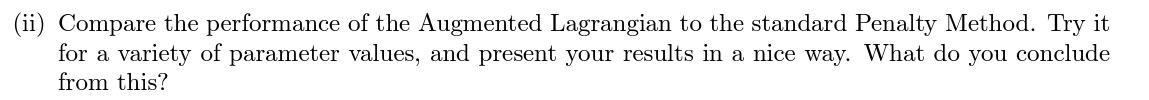

While both of them solves for constrained optimisation with a constraint, in the penalty method the penalty term is increased as the optimisation iterates until it converges. Whilst the Augmented Lagrangian method combines the penalty method and the method of lagrange multipliers. The augmented Lagrangian method is faster to converge and is more likely to find the global optimum solution. However, it can be more complicated to implement and may require a better understanding of the optimization problem.




In [179]:


def penalty_func(x ,a = 10,b = 10, r = 10, P_k= 10**12 ):
    obj_func = sum( a*(1-x[:-1])**2.0 + b*(x[1:]-x[:-1]**2.0)**2.0 ) 
    constraint_func = np.sum(x**2) - r
    return obj_func +  P_k * np.linalg.norm(constraint_func)



def augmented_lagrangian_method(x0, a, b, r, P_0, alpha, epsilon, max_iterations):
    x = x0
    P = P_0
    lamda = 1 #assume we start at this value of lamda
    for i in range(max_iterations):
        res = minimize(augmented_lagrangian, x, args=(a, b, r, lamda, P), method='BFGS', tol=epsilon, options={'maxiter': max_iterations})
        x = res.x
        constraint = np.sum(x**2) - r
        lamda_new = lamda + P * constraint
        if np.linalg.norm(constraint) < epsilon:
            break
        lamda = lamda_new
        P_final = P #to store the last iterated penalty
        P = alpha * P
    return x, P_final, i

# Test case
n = 10
a = 10
b = 10
r = 10
x0 = np.zeros(n)
P_0 = P_k = 10**12
epsilon = 1e-8
max_iterations = 10000
lamda = 1

print('for the penalty method ')
res = minimize(penalty_func, x0, method='BFGS', args=(P_k,a,b,r))
print(res)
x_opt = res.x
print("Optimal solution:", x_opt)
print("Number of iterations (penalty method):", res.nit)





for the penalty method 
      fun: 0.032942999632148126
 hess_inv: array([[ 5.00118793e-13,  4.51044647e-17,  1.75084824e-16,
         5.55930480e-17,  1.71925223e-16, -5.07441417e-17,
        -4.46987396e-17, -1.42682930e-18,  2.55061954e-17,
        -4.72191201e-12],
       [ 7.38722761e-17,  4.99909047e-13,  1.37768956e-16,
        -9.36758005e-17,  1.32152751e-16, -2.81368426e-16,
        -2.91519932e-16, -1.72986804e-16, -9.88387711e-17,
         1.29432172e-11],
       [ 1.58860238e-16,  8.83373278e-17,  5.00229669e-13,
         1.39011474e-16,  2.34406219e-16,  1.45582493e-17,
         1.73160226e-17,  6.41055018e-17,  1.38694687e-16,
        -1.23875131e-11],
       [ 7.74977515e-17, -3.20063580e-17,  1.29260936e-16,
         5.00150332e-13,  6.97652884e-17, -3.67346644e-17,
        -1.11076438e-16,  1.72841704e-17,  2.42427464e-16,
        -4.51201890e-12],
       [ 1.57306378e-16,  7.91126362e-17,  2.22917059e-16,
         1.26114675e-16,  5.00304454e-13,  1.71157975e-17,
   

In [181]:
#for augmented lagrangian 
n = 10
a = 10
b = 10
r = 10
x0 = np.zeros(n)
P_0 = P_k = 1
epsilon = 1e-8
max_iterations = 10000
lamda = 1

x_opt_augmented, P_final_augmented, num_iter_augmented = augmented_lagrangian_method(x0, a, b, r, P_0, alpha, epsilon, max_iterations)

# print("Min x solution (penalty method):", x_opt_penalty)
# print("Final penalty (penalty method):", P_final_penalty)
# print("Number of iterations (penalty method):", num_iter_penalty)
print("\nMin x solution (augmented Lagrangian method):", x_opt_augmented)
print("Final penalty (augmented Lagrangian method):", P_final_augmented)
print("Number of iterations (augmented Lagrangian method):", num_iter_augmented)


Min x solution (augmented Lagrangian method): [0.9999925  0.99999132 0.99999226 0.99999383 0.99999622 0.99999837
 1.00000035 1.00000331 1.00000908 1.00002276]
Final penalty (augmented Lagrangian method): 1
Number of iterations (augmented Lagrangian method): 1


It is important to note that in our implementation of the penalty function, it only converges for large starting penalties. Whereas, if we were to start with larger penalties for the augmented lagrangian, our implementation does not converge. hence a penalty of 1 was sufficient for it to converge in 1 iteration, further supporting the theory from before on the augmented lagrangian converging faster. We notice that in both models sufficient knowledge of the model(function) and the optimisation applications are needed to ensure convergence.

## 1d)

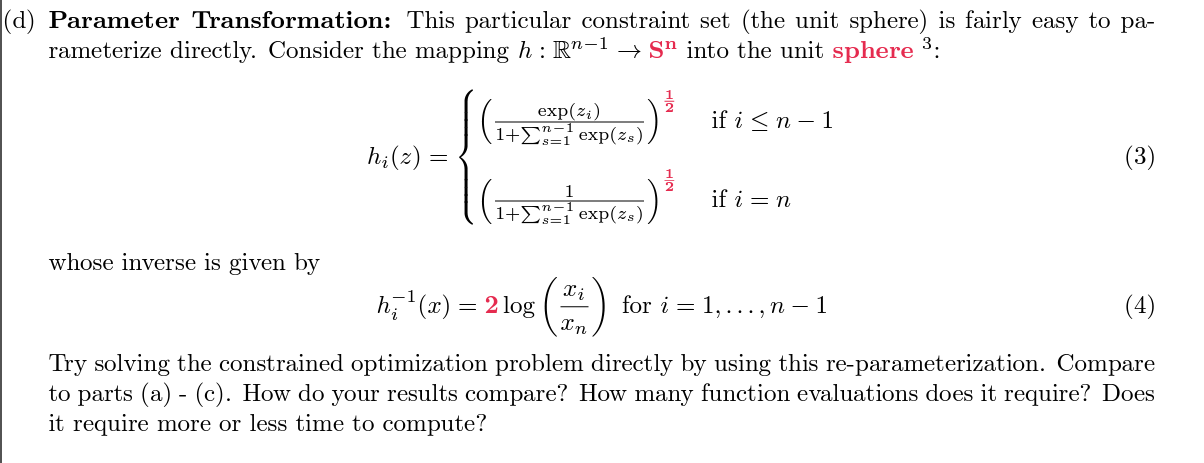

In [185]:
def constraint_func(x, r=10):
    return np.sum(x**2) - r


def h_i(z, i, n):
    exp_z = np.exp(z)
    sum_exp_z = np.sum(exp_z)
    if i < n - 1:
        return ((np.exp(z[i]) / (1 + sum_exp_z))**0.5) * n
    else:
        return (1.0 / (1 + sum_exp_z)**0.5 )*n
    
def h_inv(x):
    n = x.shape[0]
    z = np.zeros(n - 1)
    for i in range(n - 1):
        z[i] = (2 * np.log(x[i] / x[n - 1]) ) * n
    return z

def objective_transformed(z, a=10, b=10, n=10):
    x = np.zeros(n)
    for i in range(n):
        x[i] = h_i(z, i, n)
    return rosenbrock(x, a, b)

def constraint_func_transformed(z, r=10, n=10):
    x = np.zeros(n)
    for i in range(n):
        x[i] = h_i(z, i, n)
    return constraint_func(x, r)

#initial guess 
#
# z0 = 0.99 * np.ones(10)
z0 = np.ones(10)
#cons = {'type': 'eq', 'fun': constraint_func_transformed, 'args': (2,)}
#res = minimize(objective_transformed, z0, method='SLSQP', constraints=cons, args=(2,)) hj h
#lets try to do unconstrained
#res = minimize(constraint_func_transformed, z0, method='SLSQP')
res = minimize(objective_transformed, z0, method='BFGS')
x_opt = np.zeros(10)
for i in range(10):
    x_opt[i] = h_i(res.x, i, 10)

print("Optimal min x solution: ", x_opt)
# print("Objective value: ", res.fun)
print("number of iterations for reparameterisation method:", res.nit)

Optimal minn x solution:  [1.         1.         0.99999999 1.00000001 1.         1.00000002
 1.00000004 1.00000014 1.00000037 1.00000099]
number of iterations for reparameterisation method: 28


In [191]:
#1a to compare results with similar parameters
x0 = np.zeros(10)
lamda = 1
res = minimize(fun=lagrangian, x0=x0, args=(10,10,lamda, 10), method='Newton-CG',
               jac=lagrangian_gradient_func_scipy, hess=lagrangian_hessian_func_scipy, tol=1e-6)

print(res)


     fun: 0.001242735109884485
     jac: array([ 4.24017958e-06, -1.85070855e-05,  3.54989234e-05, -7.02834835e-05,
        9.38806652e-05, -1.61409391e-04,  1.45052869e-04, -2.75052102e-04,
        2.41301793e-05, -3.87490920e-04])
 message: 'Optimization terminated successfully.'
    nfev: 1976
    nhev: 988
     nit: 988
    njev: 1976
  status: 0
 success: True
       x: array([0.99999947, 0.99999903, 0.99999775, 0.99999595, 0.99999081,
       0.99998251, 0.99996234, 0.99992498, 0.999844  , 0.99968188])


Controlling for all the parameters except for the starting penalty between augmented lagrangian and penalty methods, we obtain the results below: 

Optimal solution for penalty method:
[1.00000004 1.00000007 1.00000003 1.00000005 1.00000003 1.00000009
 1.00000009 1.00000007 1.00000004 0.99999949]
number of iterations : 19

Optimal solution for augmented Lagrangian method: 
[0.9999925  0.99999132 0.99999226 0.99999383 0.99999622 0.99999837
 1.00000035 1.00000331 1.00000908 1.00002276]
number of iterations : 1

Optimal solution for reparameterisation method:
[1.         1.         0.99999999 1.00000001 1.         1.00000002
 1.00000004 1.00000014 1.00000037 1.00000099]
number of iterations : 28

Optimal solution for newton CG:
([0.99999947, 0.99999903, 0.99999775, 0.99999595, 0.99999081,
       0.99998251, 0.99996234, 0.99992498, 0.999844  , 0.99968188])
number of iterations: 988


In theory we believe convergence rates should follow from fastest to slowest: reparameterisation method, augmented lagrangian and penalty method. Our results instead show augmented lagrangian>penalty method>reparameterisation>newton cg. 

The re-parameterization approach directly parameterizes the constraint set, which in this case is the unit sphere, using a mapping function. In our case, the mapping function is the h function defined in the code. The mapping function maps an n-dimensional vector to the surface of the unit sphere, thereby satisfying the constraint. By doing this, we can transform the original constrained optimization problem into an unconstrained optimization problem. This allows us to solve the optimization problem directly using a standard optimization algorithm, such as the BFGS algorithm used in the code.


Compared to parts (a)-(c), the re-parameterization approach has several advantages. First, it eliminates the need for penalty or augmented Lagrangian methods, which can be computationally expensive. Instead, we can solve the constrained optimization problem directly with a single optimization run, which can be much faster. Second, the re-parameterization approach requires fewer function evaluations, as we only need to evaluate the objective and constraint functions once, whereas in parts (a)-(c), we need to evaluate them multiple times with increasing penalty or augmented Lagrangian parameter values until convergence is achieved. Finally, the re-parameterization approach can be more numerically stable than penalty or augmented Lagrangian methods, as it avoids the potential issues of parameter selection and numerical instability that can arise with these methods.

# Question 2

## a)
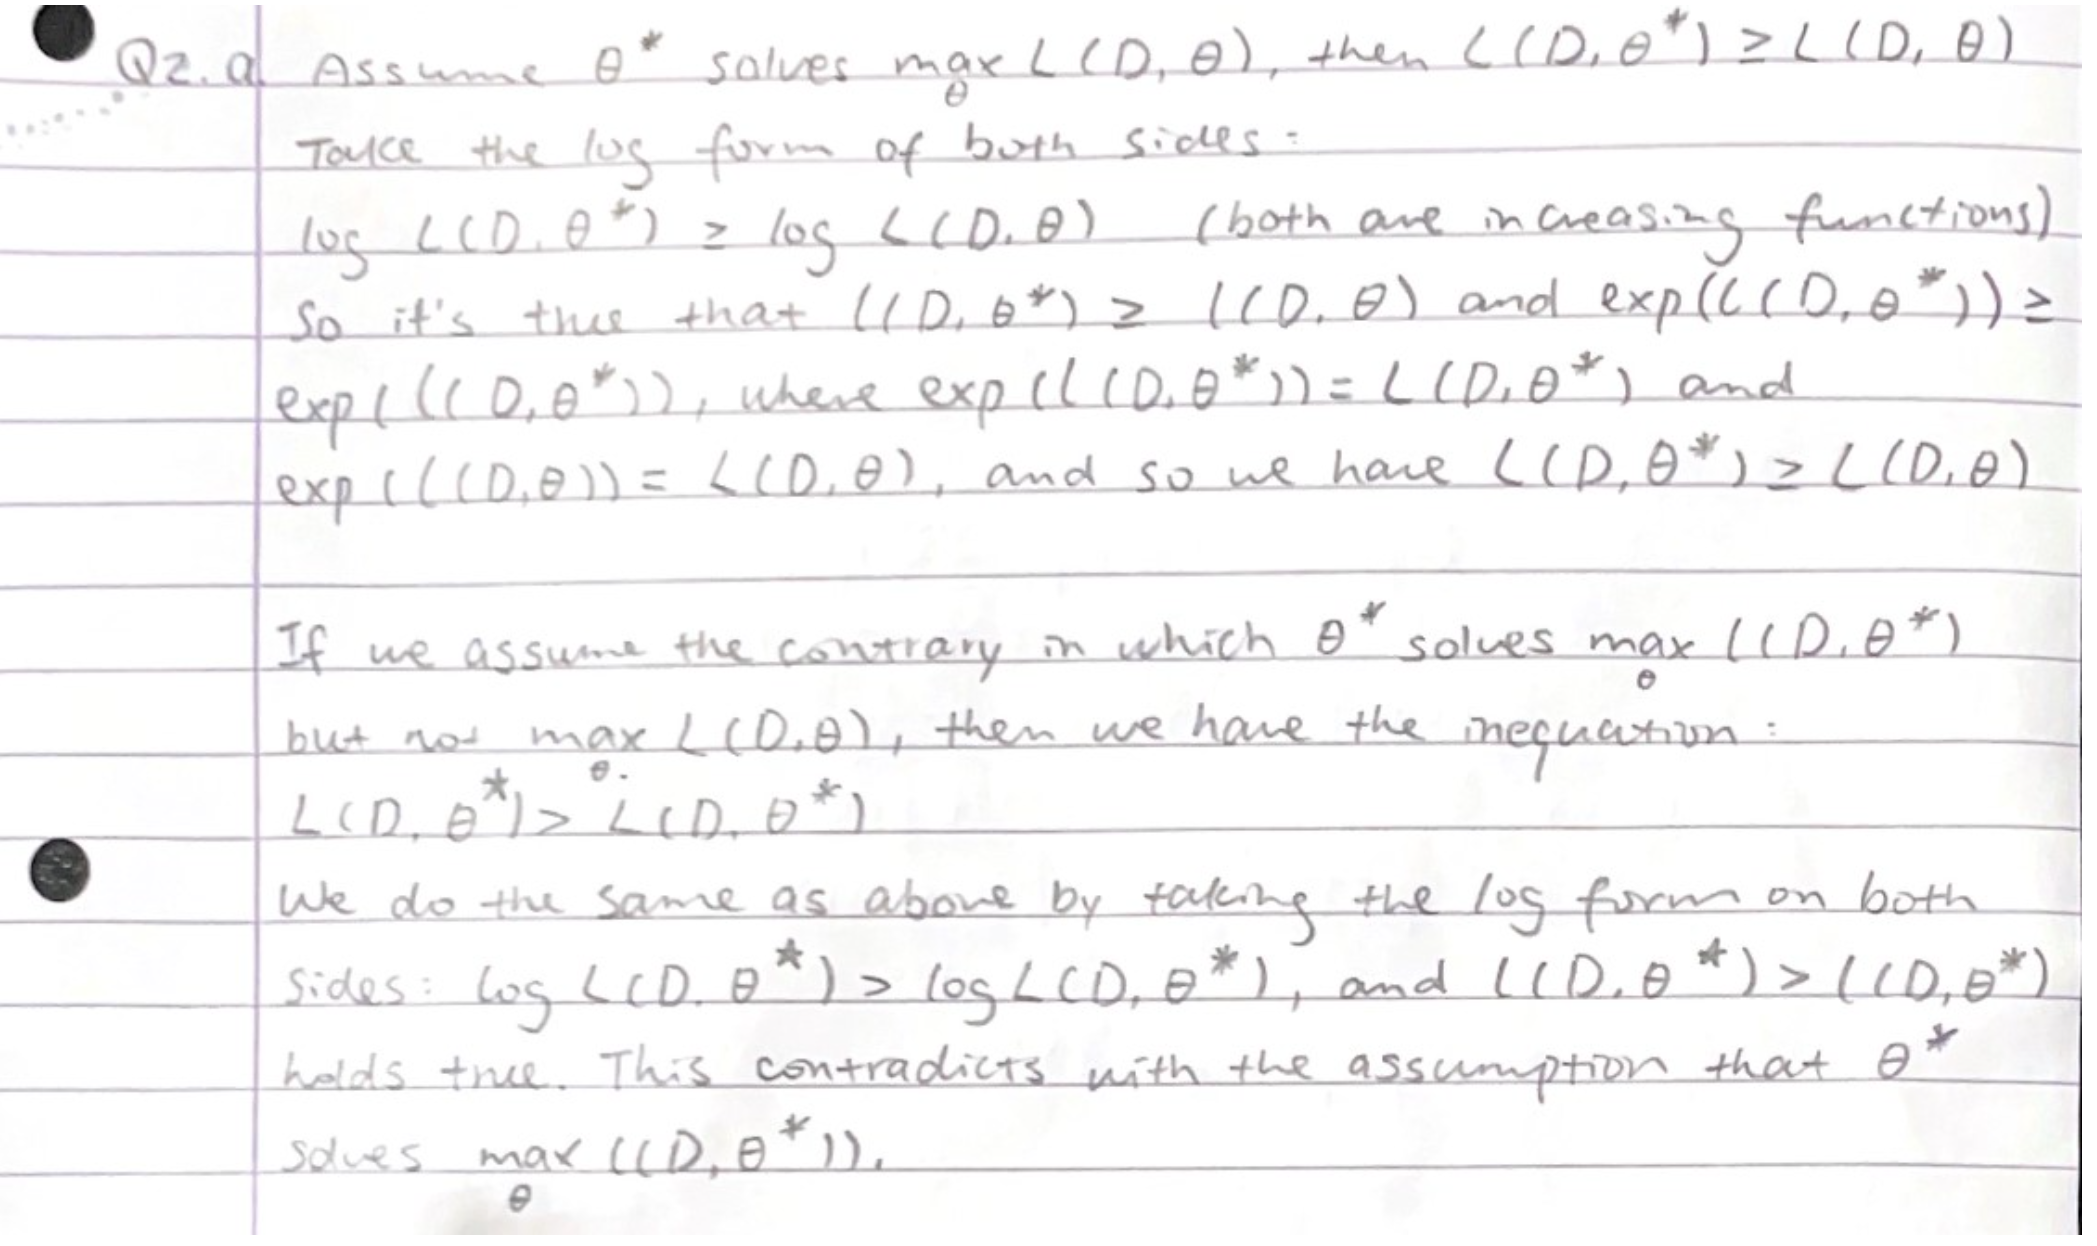







## b)
We want to avoid multiplying many small probabilities or using the exponent of a large negative value, which is the case when using $L$. 

Using the log likelihood transforms the product of probabilities into a sum of logarithms, which is more numerically stable. Furthermore $l$ is much easier to manipulate particularly when optimising for example , the gradient of $l$ is the sum of gradients of log probabilities.


We prefer working with log-likelihood funtions instead of the regular likelihood because log functions are usually "well-behaved", meaning the f''(x) does not change too rapidly, and you get a quadratic function that it is easier to optimise. Another advantge is due to the fact that computers have a limited decimal representations, and when we multiply many probabilities, this will become very close to zero. With logs we avoid this issue.

## c)

We assume that $y$ is a binary variable $[0,1]$. The sum of the probabilities for all possible outcomes is equal to 1.  Therefore the probability og $y=0$ conditional on $x$ and $\theta$ is equal to $ 1-Pr(y=1|X,\theta)$.


$Pr(y = 0|X,\theta) = \frac{\textrm{exp}(X \theta)}{1 + \textrm{exp}(X \theta)}$

## d) 

Since $y$ is binary with probabilites of $y=1$ and $y=0$. 

$\textrm{Pr}(y = 1|X, \theta) = p(X, \theta)$


 $\textrm{Pr}(y = 0|X, \theta) = 1 - p(X, \theta)$

Then we use the probabilities to write the likelihood expression 

$L(y, X, \theta) = p(X, \theta)^{y} * (1 - p(X, \theta) )^{1-y}$

Taking logs:

$\textrm{log} L(y, X, \theta) = y * \textrm{log}( p(X, \theta)) + (1-y) * \textrm{log}(1 - p(X, \theta))$


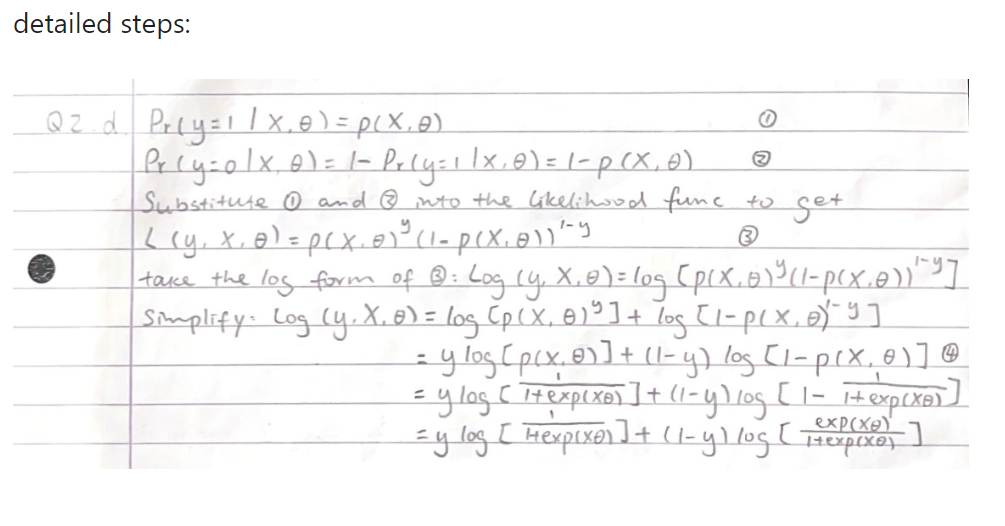

## e)

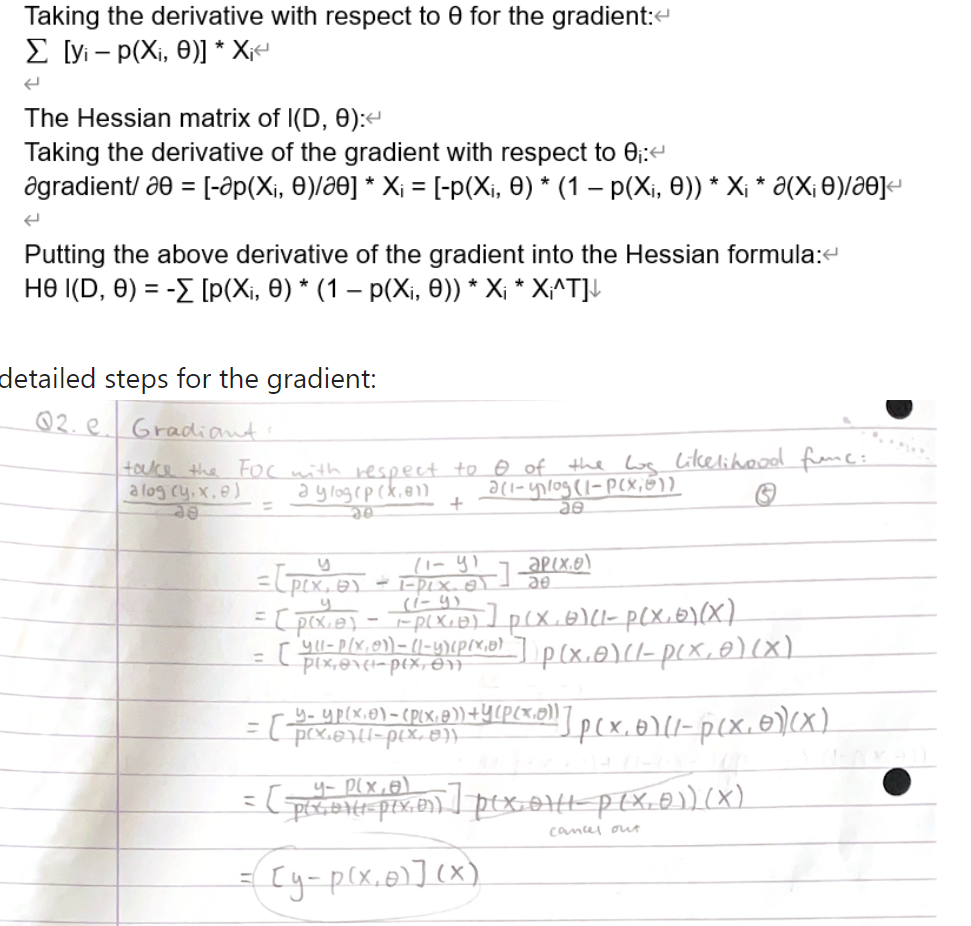

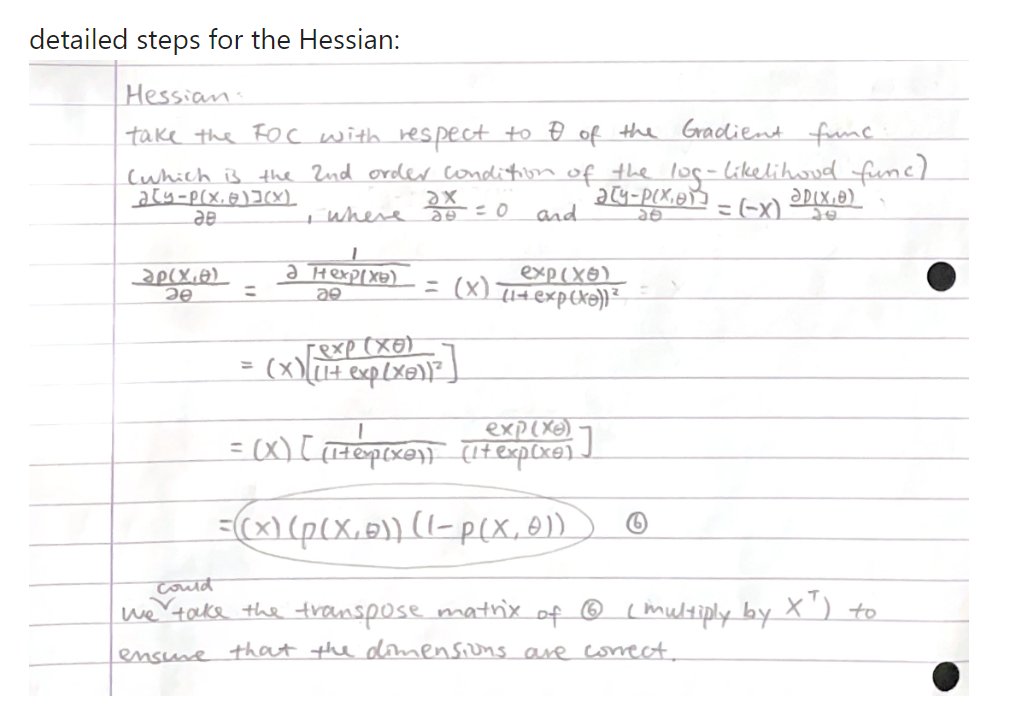




## f)



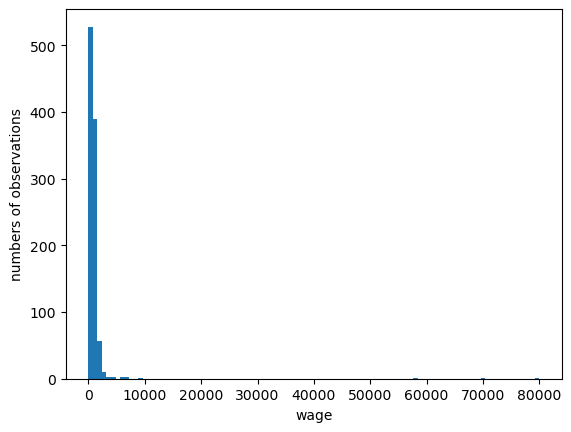

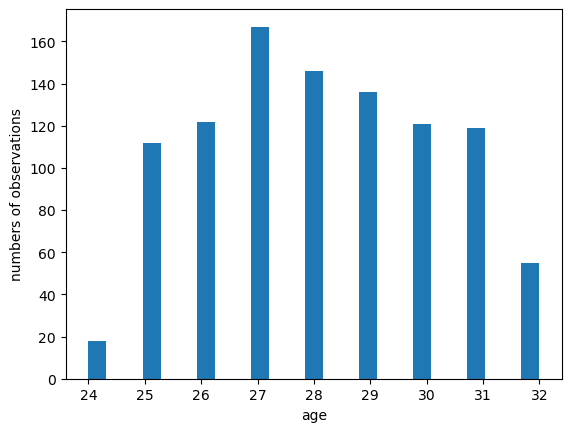

The distribution of wage is positively skewed as expected and the distribution of the age approximates a normal distribution.


In [3]:
import pandas as pd
import numpy as np
from scipy.optimize import approx_fprime
from scipy.optimize import minimize
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
# plot something informative
# the distribution of wage
plt.hist(df['wage'], bins=100)
plt.xlabel('wage')
plt.ylabel('numbers of observations')
plt.show()

# the distribution of age
plt.hist(df['age'], bins=25)
plt.xlabel('age')
plt.ylabel('numbers of observations')
plt.show()

print("The distribution of wage is positively skewed as expected and the distribution of the age approximates a normal distribution.")

## g)


In [4]:

# ===== g =====
# function that creates dummies
def dummies(data, var, dummy_name, val):
    if var == "eduyrs":
        # we assign 1 to the education dummy for those with college education for simplicity
        data[dummy_name] = data[var].str.contains("COL").astype(int)
    if var == "welfare":
        data[dummy_name] = data[var].str.contains("YES").astype(int)
    else:
        data[dummy_name] = data[var].apply(lambda x: 1 if x == val else 0)
    return data

# modify the dataframe
# create dummies
df = dummies(df, "sex", "female_dummy", "FEMALE")
df = dummies(df, "race", "white_dummy", "WHITE")
df = dummies(df, "marital", "married_dummy", "MARRIED")
df = dummies(df, "eduyrs", "college_dummy", "blah")
df = dummies(df, "welfare", "welfare_dummy", "blah")
df = dummies(df, "region", "northcentral_dummy", "NORTH CENTRAL")
df = dummies(df, "region", "northeast_dummy", "NORTHEAST")
df = dummies(df, "region", "south_dummy", "SOUTH")
df = dummies(df, "urban", "urban_dummy", "URBAN")
df = dummies(df, "unemprate", "high_unemprate_dummy", "9.0 - 11.9\%")
df = dummies(df, "empstat", "employed", "EMPLOYED")

# drop variables no long needed
df = df.drop(['sex', 'race', 'tenure', 'marital', 'eduyrs', 'welfare', 'region', 'urban', 'unemprate', 'empstat'], axis=1)

In [6]:
# select the predictors and response variable
X = df[['age', 'female_dummy', 'white_dummy', 'married_dummy', 'famsize', 'college_dummy', 'IQ', 'childsupp', 'welfare_dummy', 'northcentral_dummy', 'northeast_dummy', 'south_dummy', 'urban_dummy', 'high_unemprate_dummy']]
y = df['employed']

# print(X)
# print(y)

# functions for the gradient and Hessian found in previous sections

def logistic(x):
    return np.exp(x) / (1 + np.exp(x))

def gradient(thetas, X, y):
    p = logistic(X.dot(thetas))
    grad = X.T.dot(y - p)
    return grad

def log_likelihood(thetas, X, y):
    p = logistic(X.dot(thetas))
    ll = np.sum(y*np.log(p) + (1-y)*np.log(1-p))
    return ll


# set the arrays
X = np.array(X)
y = np.array(y)
# print(X)
theta = np.zeros(X.shape[1])
theta = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0])
theta0 = theta
# print(theta0)
result = minimize(lambda b: -log_likelihood(b, X, y), theta0, method='BFGS', jac=lambda b: -gradient(b, X, y))
theta_hat = result.x
# print(theta_hat.astype(int))

# use finite differences implementation

# the log-likelihood function to be maximized
def log_likelihood(theta, X, y):
    p = 1 / (1 + np.exp(-X @ theta))
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

# function that computes the gradient using finite differences
def compute_gradient(f, theta, h=0.001):
    grad = np.zeros(theta.shape)
    for i in range(len(theta)):
        theta_plus = theta.copy()
        theta_plus[i] += h
        theta_minus = theta.copy()
        theta_minus[i] -= h
        grad[i] = (f(theta_plus) - f(theta_minus)) / (2 * h)
    return grad


# function that computes the Hessian using finite differences
def compute_hessian(f, theta, h=0.001):
    n = len(theta)
    hessian = np.zeros((n, n))
    for i in range(n):
        theta_plus = theta.copy()
        theta_plus[i] += h
        theta_minus = theta.copy()
        theta_minus[i] -= h
        for j in range(i, n):
            theta_plus_j = theta_plus.copy()
            theta_plus_j[j] += h
            theta_minus_j = theta_minus.copy()
            theta_minus_j[j] -= h
            hessian[i, j] = (f(theta_plus_j) - f(theta_plus) - f(theta_minus_j) + f(theta_minus)) / (4 * h**2)
            hessian[j, i] = hessian[i, j]
    return hessian

# set the parameters
n = 996
p = 5
X = np.random.normal(size=(n, p))
theta0 = np.random.normal(size=p)
y = np.random.binomial(n=1, p=1 / (1 + np.exp(-X @ theta0)))

# Compute the gradient and Hessian at the true parameter values
grad_fd = compute_gradient(lambda theta: -log_likelihood(theta, X, y), theta0)
hess_fd = compute_hessian(lambda theta: -log_likelihood(theta, X, y), theta0)

print("Finite difference gradient:\n", grad_fd.astype(int))
print("Finite difference Hessian:\n", hess_fd.astype(int))

# we prefer Newton’s Method
# the log-likelihood function
def log_likelihood_NM(theta, X, y):
    p = 1 / (1 + np.exp(-X @ theta))
    return np.sum(y * np.log(p) + (1 - y) * np.log(1 - p))

# the gradient of the log-likelihood function
def grad_log_likelihood_NM(theta, X, y):
    p = 1 / (1 + np.exp(-X @ theta))
    return X.T @ (y - p)

# Dthe Hessian of the log-likelihood function
def hess_log_likelihood_NM(theta, X, y):
    p = 1 / (1 + np.exp(-X @ theta))
    W = np.diag(p * (1 - p))
    return -X.T @ W @ X

# call the functions for the result
res_NM = minimize(lambda theta: -log_likelihood_NM(theta, X, y), theta0, method='Newton-CG', jac=lambda theta: -grad_log_likelihood_NM(theta, X, y), hess=lambda theta: -hess_log_likelihood_NM(theta, X, y))
print("MLE of theta:", res_NM.x)
print('Maximum log-likelihood:', -res_NM.fun)




C:\Users\my\AppData\Local\Temp\ipykernel_2484\776526420.py:11: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / (1 + np.exp(x))
C:\Users\my\AppData\Local\Temp\ipykernel_2484\776526420.py:11: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (1 + np.exp(x))
C:\Users\my\AppData\Local\Temp\ipykernel_2484\776526420.py:20: RuntimeWarning: divide by zero encountered in log
  ll = np.sum(y*np.log(p) + (1-y)*np.log(1-p))
C:\Users\my\AppData\Local\Temp\ipykernel_2484\776526420.py:20: RuntimeWarning: invalid value encountered in multiply
  ll = np.sum(y*np.log(p) + (1-y)*np.log(1-p))
C:\Users\my\AppData\Local\Temp\ipykernel_2484\776526420.py:11: RuntimeWarning: overflow encountered in exp
  return np.exp(x) / (1 + np.exp(x))
C:\Users\my\AppData\Local\Temp\ipykernel_2484\776526420.py:11: RuntimeWarning: invalid value encountered in true_divide
  return np.exp(x) / (1 + np.exp(x))
C:\Users\my\AppData\Local\Temp\ipykernel_2484\776526420.py:20: RuntimeWarn

Finite difference gradient:
 [-6  5  0 -1  5]
Finite difference Hessian:
 [[-3423  2797   -48  -637  2602]
 [ 2797  2797   -48  -637  2602]
 [  -48   -48   -48  -637  2602]
 [ -637  -637  -637  -637  2602]
 [ 2602  2602  2602  2602  2602]]
MLE of theta: [-2.01280272  0.38802309  0.26844224 -0.17966944 -1.50285256]
Maximum log-likelihood: -399.65006435278565


## i) 


In [7]:
# L-BGFGS and Nelder-Nead
# define the negative log-likelihood function
def neg_log_likelihood_part_i(theta, X, y):
    return -np.sum(y*np.log(1/(1+np.exp(-X.dot(theta)))) + (1-y)*np.log(1-1/(1+np.exp(-X.dot(theta)))))

# call the functions for results
res_LBGFGS = minimize(neg_log_likelihood_part_i, theta0, args=(X, y), method='L-BFGS-B')
res_NM = minimize(neg_log_likelihood_part_i, theta0, args=(X, y), method='Nelder-Mead')

print('MLE of theta (L-BGFGS):', res_LBGFGS.x)
print('Maximum log-likelihood (L-BGFGS):', -res_LBGFGS.fun)
print('MLE of theta (L-Nelder-Nead):', res_NM.x)
print('Maximum log-likelihood (L-Nelder-Nead):', -res_NM.fun)

# report
print("The results of the three methods are very close.")

MLE of theta (L-BGFGS): [-2.01279936  0.3880221   0.26843879 -0.17966818 -1.50285135]
Maximum log-likelihood (L-BGFGS): -399.65006435392286
MLE of theta (L-Nelder-Nead): [-2.01281386  0.38804653  0.26842757 -0.17965479 -1.50289416]
Maximum log-likelihood (L-Nelder-Nead): -399.650064478972
The results of the three methods are very close.
